# Introduction of Word Embedding

For textual data, we need to convert it into numbers before feeding into any machine learning model.

For simplicity, we can use one-hot encoding to convert categorical features into numbers. To do so, we create dummy features for each of the category and populate them with 0’s and 1's.

For example, if a corpus has vocabulary of 10,000 words, one-hot encoding will created 10,000 features. This is not a feasible embedding approach as it demands large storage space for the word vectors and reduces model efficiency.

## Embedding Words

Embedding layer enables us to convert each word into a fixed length vector of defined size. The resultant vector is a dense one with having real values instead of just 0’s and 1’s. The fixed length of word vectors helps us to represent words in a better way along with reduced dimensions.

This way embedding layer works like a lookup table. The words are the keys in this table, while the dense word vectors are the values. To understand it better, let’s look at the implementation of Keras Embedding layer.

The entire notebook follows the blog: [Understanding Embedding Layer in Keras](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce).


## Embedding Layer in Keras


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np

There are three main parameters to the [Embedding layer](https://keras.io/api/layers/core_layers/embedding/) in Keras:

* **input_dim** : Size of the vocabulary
* **output_dim** : Length of the vector for each word
* **input_length** : Maximum length of a sequence

For example, assume 10000 words in a corpus. Now we have 32 documents, and each document is [padded](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) to have 10 words as features: 

In [3]:
import numpy as np
input_array = np.random.randint(10000, size=(32, 10))

In [4]:
print (input_array.shape)
input_array[:2]

(32, 10)


array([[1350, 8610, 5292, 2879, 7677, 9976, 1846, 5786, 5473, 7467],
       [2401, 5939, 5534, 6061,  635, 7295, 1149, 4340, 5324, 3745]])

Now we want to embed the 10000 vocabulary to 4-dimension, then we can create the embedding layer as follows

In [9]:
model = Sequential()
embedding_layer = Embedding(input_dim=10000, output_dim=4, input_length=10)
model.add(embedding_layer)
model.compile('adam','mse')

Then we have the mapping relation 10000 words to 4-dimensional embeddings as follows

In [10]:
import pandas as pd
pd.DataFrame(embedding_layer.get_weights()[0])

,0,1,2,3
0,0.026358,0.024591,0.019436,0.036759
1,-0.047438,0.027824,0.018585,-0.010783
2,0.047545,-0.007084,-0.024916,0.031520
3,0.020936,-0.005249,0.027009,-0.020963
4,-0.042636,0.033888,0.025384,-0.023274
...,...,...,...,...
9995,0.022708,-0.009748,-0.002705,0.041146
9996,0.046311,-0.015253,0.016725,0.012061
9997,-0.046385,-0.028970,-0.036961,-0.049033
9998,-0.020993,-0.001993,0.032746,0.049437


Note that in this example we did not train the embedding layer. The weights assigned to the word vectors `.get_weights()` are initialized randomly. But while working with actual text data, we need to **train the embedding layer** to get the correct word embeddings.
 
As a further example, the embedding vectors of document 1 and 2 are

In [13]:
pred = model.predict(input_array[:2])
print(pred)

[[[ 0.03664384  0.04779296  0.01755966 -0.03692968]
  [ 0.01656455 -0.01403769 -0.04381365  0.02638706]
  [ 0.03886438 -0.03794562 -0.04512653 -0.00870391]
  [-0.0092308  -0.00473259  0.02779755 -0.03879881]
  [-0.04493393  0.03414339  0.03484876 -0.00594652]
  [-0.01062686 -0.00216457 -0.04433898 -0.01452322]
  [ 0.02961585 -0.02204973  0.03946895 -0.02219971]
  [-0.04436807 -0.01464441 -0.02950623  0.04008365]
  [-0.03661226 -0.03081133  0.01604826  0.01189088]
  [ 0.02228126 -0.0015053   0.03154303  0.02432631]]

 [[ 0.03834703  0.03383719 -0.04468588  0.02813509]
  [-0.01609198  0.01568958 -0.03283242  0.04958368]
  [-0.02477733  0.00908344  0.04411265 -0.02069746]
  [-0.00530192 -0.04556967 -0.04653746 -0.03348676]
  [ 0.02846352 -0.01359844  0.02484968  0.04663614]
  [ 0.0481551  -0.01247974 -0.00671508  0.04213312]
  [-0.0336862   0.00793084 -0.01153855 -0.03680811]
  [ 0.02305714 -0.04346588  0.03861478 -0.02216472]
  [-0.02913617 -0.02754694  0.00202156 -0.008735  ]
  [ 0.0375

Originally each document is represented 10 words, and each word is embedded to a 4-dimensional vector so totally 40-dimensional embedding vectors.

## Training Word Embedding

To make word embedding more correctly, we add `Embedding` layer in Keras models and then train.

Followed by the blog: [Understanding Embedding Layer in Keras](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce), word embeddings are trained through a restaurant review classification problem.


Training the embeddings include the following steps:

1. Tokenize the sentences into words and create one-hot encoded vector for each word.
2. Use padding to ensure all sequences are of same length.
3. Pass the padded sequences as input to embedding layer.
4. Flatten and apply Dense layer to predict the label.


In [14]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

Using TensorFlow backend.


To make it simple, we will be using total of 11 reviews. Half of them are positive, represented by 0 and other half being negative, represented by 1.

In [15]:
# Define 11 restaurant reviews
reviews =['Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better', 
          'My family and I really love their food']
labels = array([1,1,1,1,1,0,0,0,0,0,0])  #Define labels

### 1. Tokenize the sentences into words and create one-hot encoded vector

We will take vocabulary size as 50 and one-hot encode the words using one_hot function from Keras.

In [60]:
vocab_size = 50
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

encoded reviews: [[43, 40, 9], [16, 44], [15, 17], [32, 5], [16, 5], [47], [47, 31], [27], [10, 6], [7, 22, 41, 36], [39, 24, 5, 48, 42, 39, 25, 5]]


Keras one_hot is basically converting each word into its one-hot encoded index: 1-50 (due to vocab_size=50). 

### 2. Use padding to ensure all sequences are of same length

Now we need to apply padding so that all the encoded reviews are of same length. If we define 4 as the maximum length and pad the encoded vectors with 0’s in the end, the encoded_reviews can be padded as

In [25]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

[[43 40  9  0]
 [16 44  0  0]
 [15 17  0  0]
 [32  5  0  0]
 [16  5  0  0]
 [47  0  0  0]
 [47 31  0  0]
 [27  0  0  0]
 [10  6  0  0]
 [ 7 22 41 36]
 [42 39 25  5]]


### 3. Put tokenizer and padding together in a systematic way

Previously we assume vocab_size = 50 and max_length = 4. In reality, we can count them and put it together, we will have:

In [70]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)

vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(sen.split()) for sen in reviews])
print ("vocab_size:", vocab_size, ", max_length:", max_length)

X_tokens = tokenizer.texts_to_sequences(reviews)
padded_reviews = pad_sequences(X_tokens, maxlen=max_length, padding='post')
print(padded_reviews)

vocab_size: 26 , max_length: 8
[[ 4  5  6  0  0  0  0  0]
 [ 2  7  0  0  0  0  0  0]
 [ 8  9  0  0  0  0  0  0]
 [10  1  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0]
 [ 3 11  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0]
 [13 14  0  0  0  0  0  0]
 [15 16 17 18  0  0  0  0]
 [19 20 21 22 23 24 25  1]]


The word count dictionaries used by the tokenizer get serialized into plain JSON:

In [75]:
tokenizer.get_config()['index_word']

'{"1": "food", "2": "horrible", "3": "awesome", "4": "never", "5": "coming", "6": "back", "7": "service", "8": "rude", "9": "waitress", "10": "cold", "11": "services", "12": "rocks", "13": "poor", "14": "work", "15": "couldn\'t", "16": "have", "17": "done", "18": "better", "19": "my", "20": "family", "21": "and", "22": "i", "23": "really", "24": "love", "25": "their"}'

In [80]:
import json
vocab_index_dict = json.loads(tokenizer.get_config()['index_word'])

Note we have 26 vocab due to considering empty string as 0:

In [97]:
print (pad_sequences(tokenizer.texts_to_sequences([""]), maxlen=max_length, padding='post'))

[[0 0 0 0 0 0 0 0]]


### 3. Train embedding model

In [71]:
model = Sequential()
embedding_layer = Embedding(input_dim=vocab_size, output_dim=4, input_length=max_length)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 8, 4)              104       
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
None


Note in the embedding layer, there are 26 vocabularies and each word is embedded to a 4-dimensional vector. Therefore there are $26 \times 4 = 106$ parameters.

In [72]:
model.fit(padded_reviews,labels,epochs=100,verbose=0)

Once the training is completed, the embedding layer learned the weights which are the vector representations of each word. Lets check the shape of the weight matrix.

In [99]:
embeddings = pd.DataFrame(embedding_layer.get_weights()[0])
print (embeddings.shape)
embeddings["word"] = [""]+[vocab_index_dict[x] for x in sorted(vocab_index_dict.keys())]
embeddings.head()

(26, 4)


,0,1,2,3,word
0,0.111693,0.045329,0.086924,0.156502,
1,-0.109979,-0.157719,-0.115343,-0.057141,food
2,0.052611,-0.078289,0.089555,-0.061803,cold
3,-0.071999,0.093805,-0.133887,0.062591,services
4,0.053413,-0.159383,0.089844,-0.053962,rocks


## 4. Visualize Word Embedding in 2D

In [101]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2)
tsne_embedded = tsne.fit_transform(embeddings[[0, 1, 2, 3]])

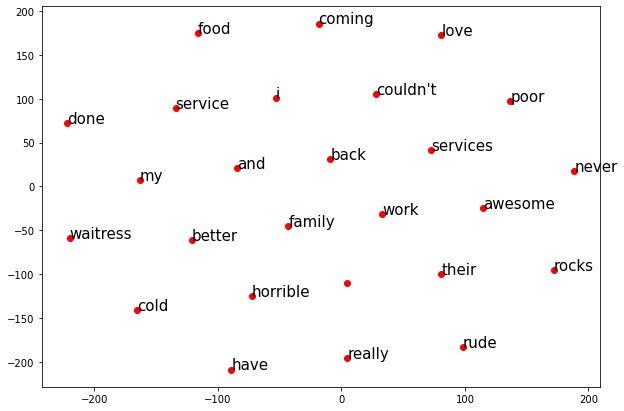

In [103]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10, 7))
for x, y, type_name in zip(tsne_embedded[:, 0], tsne_embedded[:, 1], embeddings["word"]):
    plt.plot(x, y, 'ro')
    plt.text(x, y, '%s' % (type_name), size=15)

plt.show()